In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline

# Data Preprocessing

In [2]:
#Reading the training dataset
dataset_train = pd.read_csv('D:/Users/dell1/Desktop/CERTIFICATES/Deep learning/RNN/Part+3+-+Recurrent+Neural+Networks/Part 3 - Recurrent Neural Networks/Google_Stock_Price_Train.csv')

In [3]:
#Checking the first 5 rows
dataset_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [4]:
#Checking the null values
dataset_train.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [5]:
#Converting the data to array
train_set = dataset_train.iloc[:,1:2].values

In [6]:
#Scaling the data
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
train_set = sc.fit_transform(train_set)

In [7]:
#Creating a data structure with 120 timesteps and 1 output
x_train = []
y_train = []
for i in range(120,1258):
    x_train.append(train_set[i-120:i,0])
    y_train.append(train_set[i,0])
    
x_train, y_train = np.array(x_train), np.array(y_train)   

In [8]:
#Reshaping x_train
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

# Building the RNN

In [9]:
#Initialize the RNN
regressor = tf.keras.models.Sequential()

In [10]:
#Adding the 1st LSTM layer and dropout regularisation
regressor.add(tf.keras.layers.LSTM(units = 100,return_sequences = True,input_shape = (x_train.shape[1],1)))
regressor.add(tf.keras.layers.Dropout(0.2))

In [11]:
#Adding the 2nd LSTM layer and dropout regularisation
regressor.add(tf.keras.layers.LSTM(units = 100,return_sequences = True))
regressor.add(tf.keras.layers.Dropout(0.2))

In [12]:
#Adding the 3rd LSTM layer and dropout regularisation
regressor.add(tf.keras.layers.LSTM(units = 100,return_sequences = True))
regressor.add(tf.keras.layers.Dropout(0.2))

In [13]:
#Adding the 4th LSTM layer and dropout regularisation
regressor.add(tf.keras.layers.LSTM(units = 100,return_sequences = True))
regressor.add(tf.keras.layers.Dropout(0.2))

In [14]:
#Adding the output layer
regressor.add(tf.keras.layers.Dense(units=1))

In [15]:
#Compiling the RNN
regressor.compile(optimizer='adam',loss='mean_squared_error')

In [16]:
#Fitting the RNN into the training set
regressor.fit(x_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
36/36 [==============================] - 24s 428ms/step - loss: 0.1003
Epoch 2/100
36/36 [==============================] - 15s 431ms/step - loss: 0.0734
Epoch 3/100
36/36 [==============================] - 15s 415ms/step - loss: 0.0733
Epoch 4/100
36/36 [==============================] - 15s 408ms/step - loss: 0.0721
Epoch 5/100
36/36 [==============================] - 13s 362ms/step - loss: 0.0710
Epoch 6/100
36/36 [==============================] - 15s 428ms/step - loss: 0.0702
Epoch 7/100
36/36 [==============================] - 16s 435ms/step - loss: 0.0714
Epoch 8/100
36/36 [==============================] - 16s 448ms/step - loss: 0.0707
Epoch 9/100
36/36 [==============================] - 12s 345ms/step - loss: 0.0703
Epoch 10/100
36/36 [==============================] - 17s 475ms/step - loss: 0.0705
Epoch 11/100
36/36 [==============================] - 19s 532ms/step - loss: 0.0694
Epoch 12/100
36/36 [==============================] - 20s 544ms/step - loss: 0.0689
E

36/36 [==============================] - 13s 372ms/step - loss: 0.0670
Epoch 99/100
36/36 [==============================] - 13s 372ms/step - loss: 0.0676
Epoch 100/100
36/36 [==============================] - 13s 374ms/step - loss: 0.0675


# Making the prediction and Visualizing the results

In [38]:
#getting the testing data
dataset_test = pd.read_csv('D:/Users/dell1/Desktop/CERTIFICATES/Deep learning/RNN/Part+3+-+Recurrent+Neural+Networks/Part 3 - Recurrent Neural Networks/Google_Stock_Price_Test.csv')

In [39]:
test_set = dataset_test.iloc[:,1:2].values

In [40]:
regressor.predict(X_test)

array([[[0.52025104],
        [0.49902317],
        [0.50479245],
        ...,
        [0.5064489 ],
        [0.5064255 ],
        [0.50638914]],

       [[0.52023864],
        [0.49903193],
        [0.5047915 ],
        ...,
        [0.5064255 ],
        [0.50638914],
        [0.5063393 ]],

       [[0.5202639 ],
        [0.49904004],
        [0.5048284 ],
        ...,
        [0.50638914],
        [0.5063393 ],
        [0.50632954]],

       ...,

       [[0.52055633],
        [0.4995796 ],
        [0.50562274],
        ...,
        [0.5069033 ],
        [0.5070162 ],
        [0.5071554 ]],

       [[0.52060616],
        [0.49961928],
        [0.5056696 ],
        ...,
        [0.5070162 ],
        [0.5071554 ],
        [0.50726974]],

       [[0.5206007 ],
        [0.49962687],
        [0.5056852 ],
        ...,
        [0.5071554 ],
        [0.50726974],
        [0.5072811 ]]], dtype=float32)

In [47]:
#Getting the predicted stock price
dataset_total = pd.concat((dataset_train['Open'],dataset_test['Open']),axis=0)
inputs = dataset_total[len(dataset_total)-len(dataset_test)-120:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
x_test = []
for i in range(120,140):
    x_test.append(inputs[i-120:i,0])
x_test = np.array(x_test)

In [48]:
#Reshaping x-test
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [50]:
#Making the prediction
predicted_stock_price = regressor.predict(x_test)

In [52]:
#Inverse scalig the output
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

ValueError: Found array with dim 3. None expected <= 2.

ValueError: x and y can be no greater than 2-D, but have shapes (20,) and (20, 120, 1)

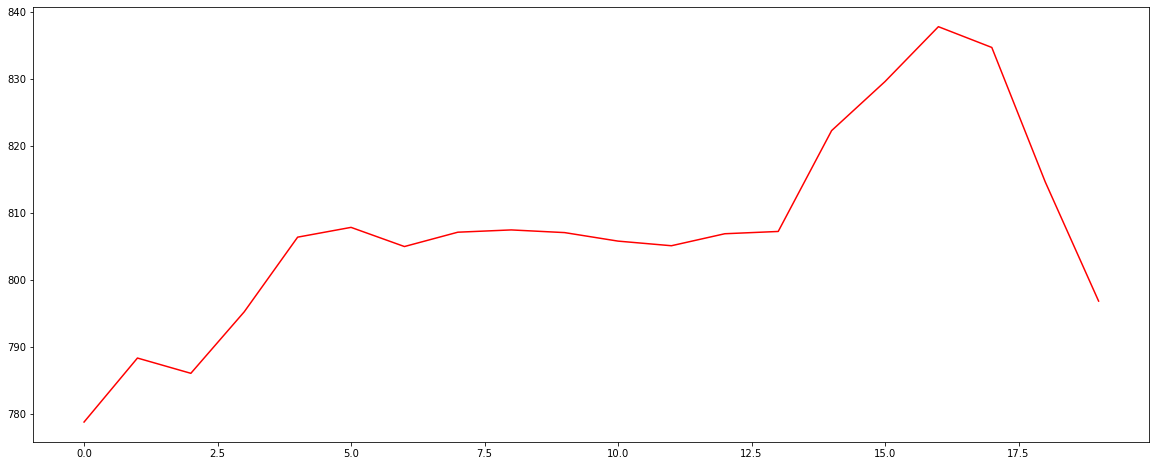

In [79]:
#Visualizing the performance through graph
plt.figure(figsize=(20,8))
plt.plot(test_set, color ='r', label = 'Real google stock price')
plt.plot(predicted_stock_price, color = 'b', label = 'Predicted google stock price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google stock price')
plt.legend()
plt.show()

In [66]:
#Saving the model
regressor.save('regressor.hdf5')

In [67]:
#loading the model
loaded_model = tf.keras.models.load_model('regressor.hdf5')

In [68]:
#saving the scaled model
import pickle
filename = 'trained_model_scaled.sav'
pickle.dump(sc,open(filename,'wb'))

In [31]:
#Loading the scaled model
loaded_model_scaled = pickle.load(open('trained_model_scaled.sav','rb'))

In [7]:
def scaledata(data):
    from sklearn.preprocessing import MinMaxScaler
    scaler = MinMaxScaler(feature_range=(0,1))
    data_target_scaled = scaler.fit_transform(np.array(data).reshape(-1,1))
    #plot_scaled = pd.DataFrame(data_target_scaled).plot()
    print(data.shape)
    return data_target_scaled, scaler

In [33]:

def futurePrediciton1D(curr_data,start="2021-02-1",end="2021-06-19"):
    '''
    '''
    x_data = curr_data[len(curr_data)-120:]
    curr_scaled = scaledata(x_data)[0]
    scaler = scaledata(curr_data)[1]
    
    #flatten into list
    x_data = list(curr_scaled.flatten())
    #convert into 3D
    x_data = np.array(x_data)
    x_data = x_data.reshape(1,len(x_data),1)
    #x_data = x_data[len(x_data)-120:]
    #x_data = tf.expand_dims(x_data,axis=1)
    
    #Predict
    nextDay = loaded_model.predict(x=x_data)
    nextDay = scaler.inverse_transform(nextDay.reshape(-1,1))

    nextDay = nextDay[-1][0]
    print("Prediction: {}".format(nextDay))
    
    #convert into dataframe again
    curr_data = pd.DataFrame(curr_data)
    curr_data.reset_index(inplace=True)
    open_cl = curr_data[['Open']]
    
    #concatenate new value
    open_cl.loc[len(open_cl.index)] = [nextDay]
    
    return open_cl


In [34]:
#Reading the training dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline
dataset_train = pd.read_csv('D:/Users/dell1/Desktop/CERTIFICATES/Deep learning/RNN/Part+3+-+Recurrent+Neural+Networks/Part 3 - Recurrent Neural Networks/Google_Stock_Price_Train.csv')

In [35]:
train_set = dataset_train.iloc[:,1:2].values
dataset_train.tail()

,Date,Open,High,Low,Close,Volume
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"
1257,12/30/2016,782.75,782.78,770.41,771.82,"1,770,000"


In [38]:
futurePrediciton1D(dataset_train['Open'],start='2012-03-01', end='2017-01-01')

(120,)
(1258,)
Prediction: 642.11474609375


C:\Users\dell1\anaconda3\lib\site-packages\pandas\core\indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


,Open
0,325.250000
1,331.270000
2,329.830000
3,328.340000
4,322.040000
...,...
1254,790.680000
1255,793.700000
1256,783.330000
1257,782.750000


In [41]:
dataset_train['Open']

0       325.25
1       331.27
2       329.83
3       328.34
4       322.04
         ...  
1253    790.90
1254    790.68
1255    793.70
1256    783.33
1257    782.75
Name: Open, Length: 1258, dtype: float64

In [24]:
loaded_model = tf.keras.models.load_model('regressor.hdf5')

In [42]:
scaledata(dataset_train['Open'])[0]

(1258,)


array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [30]:
data_target_scaled = scaledata(dataset_train['Open'])[0]
scaler = scaledata(dataset_train['Open'])[1]
data_target_scaled

(1258,)
(1258,)


array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [37]:
dataset_train

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"
...,...,...,...,...,...,...
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"


In [40]:
d = pd.read_csv('D:/Users/dell1/Downloads/GOOG.csv')

In [41]:
futurePrediciton1D(d['Open'],start='2012-03-01', end='2017-01-01')

(120,)
(250,)
Prediction: 119.86969757080078


C:\Users\dell1\anaconda3\lib\site-packages\pandas\core\indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


,Open
0,107.514503
1,114.092003
2,116.008003
3,117.550003
4,118.650002
...,...
246,117.839996
247,117.959999
248,120.089996
249,121.099998


In [42]:
d

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-07-05,107.514503,114.052597,106.249496,113.887001,113.887001,36398000
1,2022-07-06,114.092003,116.351997,112.250504,115.213501,115.213501,28852000
2,2022-07-07,116.008003,119.862000,115.533997,119.306000,119.306000,32184000
3,2022-07-08,117.550003,120.434998,117.514000,120.168503,120.168503,29082000
4,2022-07-11,118.650002,118.794502,116.234497,116.522499,116.522499,26718000
...,...,...,...,...,...,...,...
245,2023-06-26,121.466003,122.720001,118.989998,119.089996,119.089996,23185000
246,2023-06-27,117.839996,119.894997,116.910004,119.010002,119.010002,27221700
247,2023-06-28,117.959999,121.269997,117.599998,121.080002,121.080002,19753100
248,2023-06-29,120.089996,120.910004,119.209999,120.010002,120.010002,18517500
